#Regresión lineal

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/adrishg/Intersemestral_MachineLearning_Proteco2020/master/DataSets/regresionLineal.csv"
data = pd.read_csv(url)
data.head()

,poblacion,beneficio
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   poblacion  97 non-null     float64
 1   beneficio  97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


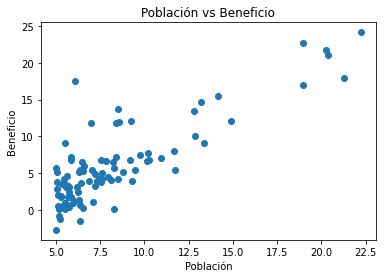

In [ ]:
#Gráfica

X = data.poblacion.values
Y = data.beneficio.values

plt.scatter(X,Y)

plt.xlabel("Población")
plt.ylabel("Beneficio")
plt.title("Población vs Beneficio")
plt.show()

In [ ]:
#1) Separar los datos de entrenamiento a los de test
def separacionDatos(X, Y, tamanioTest=0.2):
  m= Y.size
  testTamanio = int(m*tamanioTest)
  indicesTest= np.random.choice(m,testTamanio)
  #setdiff1d regresa un vector con elementos que estan el parametro uno y no en el parametro dos
  indicesEntrenamiento = np.setdiff1d(np.arange(m),indicesTest)
  return X[indicesTest], Y[indicesTest], X[indicesEntrenamiento], Y[indicesEntrenamiento]

In [ ]:
#2)Función de hipótesis
def funcionHipotesis(X, theta):
  h = X @ theta
  return h

In [ ]:
# 3)Función de costo
def funcionCosto(X,Y,theta):
  h = funcionHipotesis(X, theta)
  m = Y.size #En este ejemplo es 97
  variableDump = h - Y
  j = (variableDump @ variableDump)/(2*m)
  return j

In [ ]:
# 4) Función de gradientes de la función de costo
def gradienteCostos(X,Y,theta):
  m= Y.size
  h = funcionHipotesis(X, theta)
  dj= ((h-Y)@X) /m
  return dj

In [ ]:
# 5) Gradiente de descenso
def gradienteDescenso(X, Y, alfa, E=0.001):
  m= Y.size
  X= np.hstack([np.ones([m,1]),X])
  n = X.shape[1]

  theta= np.zeros([n])

  costoAnterior = funcionCosto(X,Y,theta)
  theta= theta-alfa * gradienteCostos(X,Y,theta)
  costoActual = funcionCosto(X,Y,theta)

  diferenciaCostos = abs(costoActual - costoAnterior)

  numIteraciones = [0, 1]
  yCostos= [ costoAnterior, costoActual ]
  i=2

  while diferenciaCostos > E:
     #mientras no converga, es decir que la derivada sea diferente de 0
     costoAnterior = costoActual
     theta= theta-alfa * gradienteCostos(X,Y,theta)
     costoActual = funcionCosto(X,Y,theta)

     diferenciaCostos = abs(costoActual - costoAnterior)

     numIteraciones.append(i)
     yCostos.append(costoActual)
     i = i+1

  plt.plot(numIteraciones, yCostos)
  plt.title('Función de costo con respecto a las iteraciones')
  plt.xlabel("Iteraciones")
  plt.ylabel("Costo")

  print("El último costo:",yCostos[-1])
  plt.show()

  return theta

El último costo: 5.87653629305866


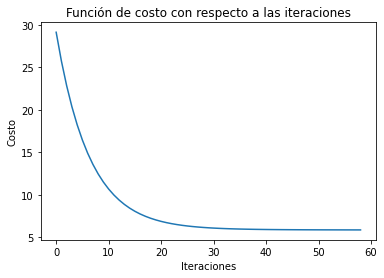

In [ ]:
alfa=0.001
X = X.reshape([Y.size,1])
#Separación entre test y training

xTest, yTest, xEntrenamiento, yEntrenamiento = separacionDatos(X,Y)
theta = gradienteDescenso(xEntrenamiento, yEntrenamiento, alfa)

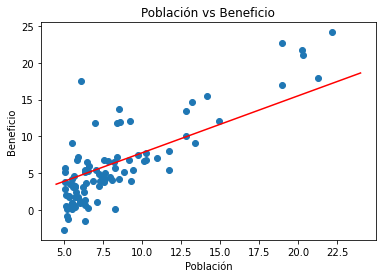

In [ ]:
#Gráfica

X = data.poblacion.values
Y = data.beneficio.values

plt.scatter(X,Y)

x = np.linspace(4.5,24)
y = theta[0]+ theta[1]*x
plt.plot(x,y,'r')

plt.xlabel("Población")
plt.ylabel("Beneficio")
plt.title("Población vs Beneficio")
plt.show()

In [ ]:
#Predecir el valor de algún dato en nuestro test Set
print("El valor en x es: {0}".format(xTest[0]))
print("El valor en y es {0}".format(yTest[0]))
yPredicho= theta[0]+theta[1]*xTest[0]
print("El valor predicho de y es: {0}".format(yPredicho))


El valor en x es: [5.7737]
El valor en y es 2.4406
El valor predicho de y es: [4.50785217]


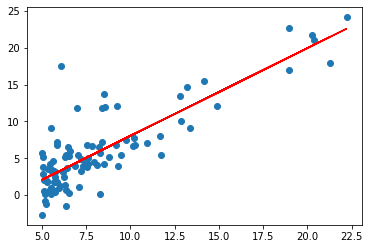

In [ ]:
from sklearn.linear_model import LinearRegression

X= data['poblacion'].values.reshape(-1,1)
Y= data['beneficio'].values.reshape(-1,1)

modeloDeRegresion = LinearRegression()
modeloDeRegresion.fit(X,Y)
yPredicha = modeloDeRegresion.predict(X)

theta1 = modeloDeRegresion.coef_[0][0]
tetha0 = modeloDeRegresion.intercept_[0]

plt.scatter(data['poblacion'],data['beneficio'])
plt.plot(X, yPredicha, 'r')
plt.show()
